# Lector de Snaps provenientes de simulaciones en GADGET code
## Este NoteNook tiene como objetivo trabajar los datos que vienen de una simulación del nacimiento de protro estrellas.
Las variables a leer son: la posición (x,y,z) de cada partícula, la velocidad (v<sub>x</sub>,v<sub>y</sub>,v<sub>z</sub>) y la dencidad.
Con estos datos se dterminan los centros de masas para poder predecir su pocición en el tiempo.

### Importar
Importamos las bibliotecas necesarias

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from pygadgetreader import *
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
import pandas as pd
import matplotlib.colors as colors
from scipy.signal import argrelextrema

### Inicializar
Inicializamos las variables de almacenamiento de los datos de los centros de masa y las Sanps desde una carpeta de origen externa y las almacenamos en una lista

In [4]:
open_snap = []
for i in range(8):
  link = "/mnt/d/pt/snaps/snapshot_0070." + str(i)
  path_snap = Path(link)
  open_snap.append(open(path_snap))

### Posiciones
Usamos las funciones de pygadreader, obteniendo solo las partículas que estén en un rango determinado guardando los datos de id, posición y densidad en listas.

In [10]:
pid = []
pos_x = []
pos_y = []
pos_z = []
rho = []
vel_x = []
vel_y = []
vel_z = []

In [11]:
def reducir_rango():
  for e in range(8):
    pid_pr = readsnap(open_snap[e].name,"pid","gas")
    pos_pr = readsnap(open_snap[e].name,"pos","gas")
    rho_pr = readsnap(open_snap[e].name,"rho","gas")
    vel_pr = readsnap(open_snap[e].name,"vel","gas")

    for i in range(len(pid_pr)):
      if -0.5 <= pos_pr[i][0] <= 0.5 and -0.5 <= pos_pr[i][1] <= 0.5 and -0.1 <= pos_pr[i][2] <= 0.1:
        pid.append(pid_pr[i])
        pos_x.append(pos_pr[i][0])
        pos_y.append(pos_pr[i][1])
        pos_z.append(pos_pr[i][2])
        vel_x.append(vel_pr[i][0])
        vel_y.append(vel_pr[i][1])
        vel_z.append(vel_pr[i][2])
        rho.append(rho_pr[i])    

In [12]:
reducir_rango()

Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities
Returning GAS   Particle IDs
Returning GAS   Positions
Returning GAS   Density
Returning GAS   Velocities


In [13]:
df = pd.DataFrame()
df["Id"] = pid
df["Posicion_x"] = pos_x
df["Posicion_y"] = pos_y
df["Posicion_z"] = pos_z
df["Velocidad_x"] = vel_x
df["Velocidad_y"] = vel_y
df["Velocidad_z"] = vel_z
df["Densidad"] = rho
df = df.drop_duplicates(df.columns[~df.columns.isin(["Id"])],keep="first")

In [14]:
df["Posicion_x"] = np.round(df["Posicion_x"], decimals=2)
df["Posicion_y"] = np.round(df["Posicion_y"], decimals=2)

In [15]:
df_complp = df.drop(["Id"], axis=1)
df = df.drop(["Id"], axis=1)
df = df.drop(["Posicion_z"], axis=1)
df = df.drop(["Velocidad_x"], axis=1)
df = df.drop(["Velocidad_y"], axis=1)
df = df.drop(["Velocidad_z"], axis=1)

In [16]:
df = df.groupby(by=["Posicion_x", "Posicion_y"]).mean()
df

Densidad
Posicion_x Posicion_y          
-0.5       -0.50       0.155679
           -0.49       0.215765
           -0.48       0.240297
           -0.47       0.253843
           -0.46       0.275679
...                         ...
 0.5        0.46       0.282891
            0.47       0.255685
            0.48       0.222872
            0.49       0.204076
            0.50       0.212614

[10193 rows x 1 columns]

In [17]:
x_graf = []
y_graf = []
#rho_graf = []
for i in range(len(df)):
  x_graf.append(df.index[i][0])
  y_graf.append(df.index[i][1])
dfn = pd.DataFrame()
dfn["Posicion_x"] = x_graf
dfn["Posicion_y"] = y_graf
dfn["Densidad"] = df["Densidad"].values

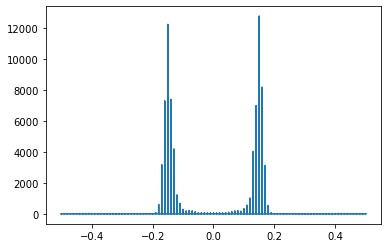

In [20]:
plt.plot(dfn["Posicion_x"], dfn["Densidad"])

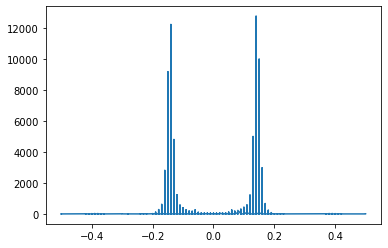

In [26]:
dfaux = dfn.sort_values("Posicion_y")
dfaux.head()
plt.plot(dfaux["Posicion_y"], dfaux["Densidad"])

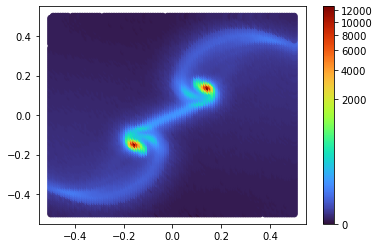

In [22]:
s = plt.scatter(dfn["Posicion_x"], dfn["Posicion_y"], c=dfn["Densidad"], cmap="turbo", norm=colors.PowerNorm(0.3))
c = plt.colorbar()
plt.clim(vmin=df["Densidad"].min(), vmax=df["Densidad"].max())

In [65]:
picos = []
px = []
py = []
maximos = []
pos_pic = []
pk = []
N = 0
maxi = dfn["Densidad"].max()*0.1
for i in range(len(dfn)):
  if dfn["Densidad"][i] > dfn["Densidad"].max()*0.1:
    if dfn["Densidad"][i] > maxi:
      maxi = dfn["Densidad"][i]
    else:
      picos.append(maxi)
      px.append(dfn["Posicion_x"][i-1])
      maxi = dfn["Densidad"].max()*0.1
for i in range(len(dfaux)):
  if dfaux["Densidad"][i] > dfaux["Densidad"].max()*0.1:
    if dfaux["Densidad"][i] > maxi:
      maxi = dfaux["Densidad"][i]
    else:
      picos.append(maxi)
      py.append(dfn["Posicion_y"][i-1])
      maxi = dfaux["Densidad"].max()*0.1
pk = argrelextrema(np.array(picos), np.greater)
N = len(pk[0])
for i in range(N):
  maximos.append(picos[pk[0][i]])
maximos = list(set(maximos))
N = len(maximos)
for i in range(N):
  pos_pic.append([px[pk[0][i]], py[pk[0][i]]])
print(N)
print(maximos)
pos_pic

2
[12760.972, 12227.067]


[[-0.15000000596046448, -0.14000000059604645],
 [0.15000000596046448, 0.14000000059604645]]

In [73]:
pos_pic[0][1]

-0.14000000059604645

In [76]:
def rangos(n):
  check = 0
  rango_i_x = pos_pic[n][0]
  rango_f_x = pos_pic[n][0]
  rango_i_y = pos_pic[n][1]
  rango_f_y = pos_pic[n][1]
  for i in range(len(df_complp)):
    if df_complp["Densidad"][i] >= maximos[n]*0.01:
      for e in range(N):
        if e != n and abs(df_complp["Posicion_x"][i]-pos_pic[n][0]) > abs(df_complp["Posicion_x"][i]-pos_pic[e][0]) and abs(df_complp["Posicion_y"][i]-pos_pic[n][1]) > abs(df_complp["Posicion_y"][i]-pos_pic[e][1]):
          check = 1
      if check == 0:
        if df_complp["Posicion_x"][i] < rango_i_x:
          rango_i_x = df_complp["Posicion_x"][i]
        elif df_complp["Posicion_x"][i] > rango_f_x:
          rango_f_x = df_complp["Posicion_x"][i]
        if df_complp["Posicion_y"][i] < rango_i_y:
          rango_i_y = df_complp["Posicion_y"][i]
        elif df_complp["Posicion_y"][i] > rango_f_y:
          rango_f_y = df_complp["Posicion_y"][i]
  return [rango_i_x, rango_f_x, rango_i_y, rango_f_y]

In [77]:
ran = rangos(0)
ran

[-0.18, -0.06, -0.19, -0.05]

In [79]:
def centro_masa(n):
  sum_x = 0
  sum_y = 0
  sum_z = 0
  sumv_x = 0
  sumv_y = 0
  sumv_z = 0
  masa = 0
  cont = 0
  rango = rangos(n)
  for i in range(len(df_complp)):
    if rango[0] <= df_complp["Posicion_x"][i] <= rango[1] and rango[2] <= df_complp["Posicion_y"][i] <= rango[3]:
      sum_x = sum_x+(df_complp["Posicion_x"][i]*df_complp["Densidad"][i])
      sum_y = sum_y+(df_complp["Posicion_y"][i]*df_complp["Densidad"][i])
      sum_z = sum_z+(df_complp["Posicion_z"][i]*df_complp["Densidad"][i])
      sumv_x = sumv_x+(df_complp["Velocidad_x"][i]*df_complp["Densidad"][i])
      sumv_y = sumv_y+(df_complp["Velocidad_y"][i]*df_complp["Densidad"][i])
      sumv_z = sumv_z+(df_complp["Velocidad_z"][i]*df_complp["Densidad"][i])
      cont = cont + 1
      masa = masa+df_complp["Densidad"][i]
  x_cm = sum_x/masa
  y_cm = sum_y/masa
  z_cm = sum_z/masa
  vel_x_cm = sumv_x/masa
  vel_y_cm = sumv_y/masa
  vel_z_cm = sumv_z/masa
  return [x_cm, y_cm, z_cm, vel_x_cm, vel_y_cm, vel_z_cm, masa, cont, rango]

In [81]:
cm = centro_masa(0)
cm

[-0.14849105539296215,
 -0.14238797376175402,
 0.0012869146842591401,
 0.6433810831393065,
 -0.1463237689873149,
 0.00660714643601253,
 1273166111.7482116,
 328610,
 [-0.18, -0.06, -0.19, -0.05]]